Voici le lien de la bd utilisée : https://drive.google.com/drive/folders/1q-wbexVnJx9mnw_YWhuueoRj47LCdsQG?usp=share_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from keras.wrappers.scikit_learn import KerasClassifier
import warnings
from keras.preprocessing.image import ImageDataGenerator
import cv2
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filenames = glob.glob("/content/drive/MyDrive/RVM2/TRAIN/*/*.jpg")
print(len(filenames))
start = "/content/drive/MyDrive/RVM2/train"
relative_paths=[]
categories = []

for filename in filenames:
    rp = os.path.relpath(filename, start)
    relative_path = rp.split('/')[0] 
    relative_paths.append(relative_path)
    
df = pd.DataFrame({
    'image': filenames,
    'label': relative_paths
})

df

329


,image,label
0,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,..
1,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,..
2,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,..
3,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,..
4,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,..
...,...,...
324,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,..
325,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,..
326,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,..
327,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,..


modeling


In [ ]:
filenames = glob.glob("/content/drive/MyDrive/RVM2/TRAIN/*/*.jpg")
print(len(filenames))
start = "/content/drive/MyDrive/RVM2/TRAIN"
relative_paths=[]
categories = []

for filename in filenames:
    rp = os.path.relpath(filename, start)
    relative_path = rp.split('/')[0] 
    relative_paths.append(relative_path)
    
df_train = pd.DataFrame({
    'image': filenames,
    'label': relative_paths
})

df_train

329


,image,label
0,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,PLASTIC_1L
1,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,PLASTIC_1L
2,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,PLASTIC_1L
3,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,PLASTIC_1L
4,/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_1L/c...,PLASTIC_1L
...,...,...
324,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,plastic_1.5L
325,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,plastic_1.5L
326,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,plastic_1.5L
327,/content/drive/MyDrive/RVM2/TRAIN/plastic_1.5L...,plastic_1.5L


In [ ]:
filenames = glob.glob("/content/drive/MyDrive/RVM2/TEST/*/*.jpg")
print(len(filenames))
start = "/content/drive/MyDrive/RVM2/TEST"
relative_paths=[]
categories = []

for filename in filenames:
    rp = os.path.relpath(filename, start)
    relative_path = rp.split('/')[0] 
    relative_paths.append(relative_path)
    
df_test = pd.DataFrame({
    'image': filenames,
    'label': relative_paths
})

df_test

37


,image,label
0,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
1,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
2,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
3,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
4,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
5,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
6,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
7,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
8,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L
9,/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/...,plastic_1.5L


In [ ]:
num_classes =len(df_train.label.unique())
print(df_train.label.unique())

['PLASTIC_1L' 'PLASTIC_2L' 'PLASTIC_0.5L' 'plastic_1.5L']


# 1er modele

In [ ]:
import cv2
import pandas as pd
import os

def ajouter_bouteille_au_csv(image_path, csv_path):
    
    classe = os.path.basename(os.path.dirname(image_path))

    # Charger l'image
    img = cv2.imread(image_path)

    # Convertir l'image en niveaux de gris pour faciliter la détection des contours
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Appliquer un filtre de seuillage pour détecter les contours de la bouteille
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Trouver les contours dans l'image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Trouver le contour de la bouteille en fonction de sa taille
    bouteille_contour = None
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.03 * perimeter, True)
        if len(approx) == 5:
            bouteille_contour = approx
            break

    # Calculer les dimensions de la bouteille
    x, y, w, h = cv2.boundingRect(bouteille_contour)
    hauteur = h
    diametre = w

    # Charger le fichier CSV existant
    try:
        # df = pd.read_csv(csv_path)
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        # Si le fichier CSV n'existe pas encore, créer un nouveau dataframe vide
        df = pd.DataFrame(columns=['hauteur', 'diametre', 'classe'])

    # Ajouter une nouvelle ligne au dataframe avec les dimensions et la classe de la bouteille
    new_row = {'hauteur': hauteur, 'diametre': diametre, 'classe': classe}
    df = df.append(new_row, ignore_index=True)
    df.to_csv(csv_path, index=False)
    return [[hauteur,diametre]]

In [ ]:
for i in range(len(df.index)):
  ajouter_bouteille_au_csv(df['image'][i], "/content/Classeur1.csv")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Charger les données d'entraînement depuis le fichier CSV
data = pd.read_csv("/content/Classeur1 (1).csv")

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data[['hauteur', 'diametre']], data['classe'], test_size=0.2)

# Entraîner un modèle SVM sur les données d'entraînement
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Évaluer les performances du modèle sur les données de test
accuracy = svm.score(X_test, y_test)
print(f"Exactitude du modèle : {accuracy}")

# Utiliser le modèle pour prédire la classe d'une nouvelle bouteille
new_bottle = "/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_2L/DIMA_2L0.jpg" # hauteur = 10, diamètre = 5
dim_new_bottle = ajouter_bouteille_au_csv(new_bottle, "/content/Classeur1.csv")
predicted_class = svm.predict(dim_new_bottle)
print(f"Classe prédite : {predicted_class}")

Exactitude du modèle : 0.4090909090909091
Classe prédite : ['PLASTIC_0.5L']


# 2ème modèle *(avec YOLOv3)*

In [ ]:
import cv2
import numpy as np
import math
#This is a function that takes an image path and a neural network object (net) as input, and returns the dimensions of a detected bottle in the image.
def calculate_bottle_volume(image_path,net):
    # set classes
    classes = []
    with open("/content/drive/MyDrive/coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    #The function starts by reading in the image using the OpenCV library and pre-process it to create a blob that can be used as input to the neural network. 
    #It then feeds the blob into the neural network to obtain a prediction of the object(s) present in the image.
    img = cv2.imread(image_path)

    # get image dimensions
    height, width, channels = img.shape

    # create input blob
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)

    # set input blob as network input
    net.setInput(blob)

    # perform forward pass
    outs = net.forward(net.getUnconnectedOutLayersNames())

    # initialize variables for bottle dimensions
    bottle_width = 0
    bottle_height = 0
    #Then we have a loop function to extracts the  dimensions, and stores the width and height of the bottle and return it in a list.
    # loop through outputs and detect bottle
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and classes[class_id] == "bottle":
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                # get bottle dimensions
                bottle_width = w
                bottle_height = h
                # draw bounding box
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return [bottle_width,bottle_height]

In [ ]:
import cv2
import csv

# list to store results
results = []
# loop through image paths and calculate bottle volume for each image
# load YOLOv3 model and configuration

#we have loop function to calculate the dimensions of a detected bottle in the image in our dataset using a pre-trained YOLOv3 model
net = cv2.dnn.readNet("/content/drive/MyDrive/yolov3.weights", "/content/drive/MyDrive/yolov3.cfg")
for image_path in df['image']:
    result = calculate_bottle_volume(image_path,net)
    classe = os.path.basename(os.path.dirname(image_path))
    result.append(classe)
    results.append(result)
    print(results)
#Finally, the results are written to a CSV file named "Classeur2.csv" using the CSV library. 
#The first line of the CSV file contains the headers "width", "height", and "class"

with open('/content/Classeur2.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['width', 'height','class'])
    for volume in results:
        writer.writerow(volume)

[[859, 286, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L'], [686, 306, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L'], [686, 306, 'PLASTIC_1L'], [612, 279, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L'], [686, 306, 'PLASTIC_1L'], [612, 279, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L'], [686, 306, 'PLASTIC_1L'], [612, 279, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L'], [0, 0, 'PLASTIC_1L']]
[[859, 286, 'PLASTIC_1L'], [1073, 301, 'PLASTIC_1L'], [661, 252, 'PLASTIC_1L'], [

In [ ]:
# convert the csv data to a dataframe to apply the model
data = pd.read_csv('/content/Classeur2.csv')

In [ ]:
#We found that there are values equal to zero, so we replaced them with NaN to remove them later
data['width'] = data['width'].replace(0, np.nan) # remplacer les zéros avec NAN
data['height'] = data['height'].replace(0, np.nan) # remplacer les zéros avec NAN

In [ ]:
data = data.dropna()

In [ ]:
data

,width,height,class
0,859.0,286.0,PLASTIC_1L
1,1073.0,301.0,PLASTIC_1L
2,661.0,252.0,PLASTIC_1L
4,686.0,306.0,PLASTIC_1L
5,612.0,279.0,PLASTIC_1L
...,...,...,...
319,743.0,302.0,plastic_1.5L
320,654.0,314.0,plastic_1.5L
321,583.0,291.0,plastic_1.5L
326,967.0,321.0,plastic_1.5L


On a éliminé les données manquantes.

width    Axes(0.125,0.845929;0.034292x0.0340708)
dtype: object

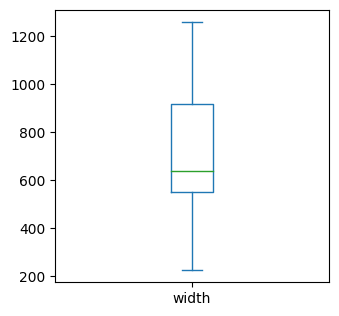

In [ ]:
#We created a box plot to check if there are still missing values, and in our case, there are none.
data['width'].plot(kind="box", subplots=True, layout=(19,19), figsize=(80,80))

height    Axes(0.125,0.845929;0.034292x0.0340708)
dtype: object

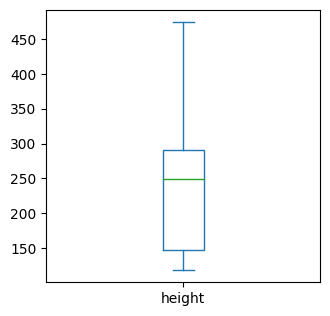

In [ ]:
data['height'].plot(kind="box", subplots=True, layout=(19,19), figsize=(80,80))

Pas de données abérrantes => on passe à la modélisation.

##We are now going to move on to modeling. First, we will test the SVM model.

# SVM model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#This code performs SVM classification on the bottle dataset.
# It first splits the data into training and testing sets using the train_test_split function .
X_train, X_test, y_train, y_test = train_test_split(data[['width', 'height']], data['class'], test_size=0.2)

# Entraîner un modèle SVM sur les données d'entraînement
#Then it creates an SVM classifier with a linear kernel using the SVC class, 
#and trains the classifier on the training set using the fit method.
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

#The accuracy of the SVM model is evaluated on the test set using the score method. 
accuracy = svm.score(X_test, y_test)
print(f"Exactitude du modèle : {accuracy}")

#Finally, the SVM model is used to predict the class of a new bottle image. 
#The image dimensions are first calculated using the calculate_bottle_volume function, 
#and then the SVM classifier predicts the class of the bottle based on its dimensions using the predict method.
new_bottle = "/content/drive/MyDrive/RVM2/TRAIN/PLASTIC_2L/DIMA_2L0.jpg"
dim_new_bottle = calculate_bottle_volume(new_bottle,net)
print(dim_new_bottle)
predicted_class = svm.predict([dim_new_bottle])
print(f"Classe prédite : {predicted_class}")

Exactitude du modèle : 0.8392857142857143
[1040, 351]
Classe prédite : [2]


In [ ]:
# Utiliser le modèle pour prédire la classe d'une nouvelle bouteille
new_bottle = "/content/drive/MyDrive/RVM2/TEST/PLASTIC_0.5L/aqualine0.jpg"
dim_new_bottle = calculate_bottle_volume(new_bottle,net)
print(dim_new_bottle)
predicted_class = svm.predict([dim_new_bottle])
print(f"Classe prédite : {predicted_class}")

[570, 144]
Classe prédite : ['PLASTIC_0.5L']


In [ ]:
# Utiliser le modèle pour prédire la classe d'une nouvelle bouteille
new_bottle = "/content/drive/MyDrive/RVM2/TEST/plastic_1.5L/sabrine_1.5Lsb0.jpg"
dim_new_bottle = calculate_bottle_volume(new_bottle,net)
print(dim_new_bottle)
predicted_class = svm.predict([dim_new_bottle])
print(f"Classe prédite : {predicted_class}")

[1228, 294]
Classe prédite : ['plastic_1.5L']


In [ ]:
# Utiliser le modèle pour prédire la classe d'une nouvelle bouteille
new_bottle = "/content/drive/MyDrive/RVM2/TEST/PLASTIC_2L/DIMA_2L4.jpg"
dim_new_bottle = calculate_bottle_volume(new_bottle,net)
print(dim_new_bottle)
predicted_class = svm.predict([dim_new_bottle])
print(f"Classe prédite : {predicted_class}")

[942, 337]
Classe prédite : ['PLASTIC_2L']


In [ ]:
# Utiliser le modèle pour prédire la classe d'une nouvelle bouteille
new_bottle = "/content/drive/MyDrive/RVM2/TEST/PLASTIC_1L/mira_sb2.jpg"
dim_new_bottle = calculate_bottle_volume(new_bottle,net)
print(dim_new_bottle)
predicted_class = svm.predict([dim_new_bottle])
print(f"Classe prédite : {predicted_class}")

[809, 188]
Classe prédite : ['PLASTIC_1L']


In [ ]:
import pickle
# Save the trained model to a file
filename = '/content/drive/MyDrive/RVM2/volume.h5'
pickle.dump(svm, open(filename, 'wb'))

# Linear Regression model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder class
encoder = LabelEncoder()

# Fit the encoder to the class labels
encoder.fit(data['class'])

# Transform the class labels into numerical format
data['class'] = encoder.transform(data['class'])

# Print the encoded labels
print(data['class']) # Output: [0 1 2]

0      1
1      1
2      1
4      1
5      1
      ..
319    3
320    3
321    3
326    3
328    3
Name: class, Length: 277, dtype: int64


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data[['width', 'height']], data['class'], test_size=0.2)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Évaluer les performances du modèle sur les données de test
accuracy = model.score(X_test, y_test)
print(f"Exactitude du modèle : {accuracy}")

# Utiliser le modèle pour prédire la classe d'une nouvelle bouteille
new_bottle = "/content/drive/MyDrive/RVM2/TEST/PLASTIC_1L/mira_sb2.jpg"
dim_new_bottle = calculate_bottle_volume(new_bottle,net)
print(dim_new_bottle)
predicted_class = model.predict([dim_new_bottle])
print(f"Classe prédite : {predicted_class}")

Exactitude du modèle : 0.6346737951104092
[809, 188]
Classe prédite : [0.6797179]


L'accuracy du 1er modele est de 83% tandis que l'accuracy du 2ème modele est de 63% => On garde le 1er (SVM).